In [58]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import (
    classification_report, confusion_matrix, accuracy_score, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score, f1_score,
    mean_absolute_error, mean_squared_error, r2_score
)
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import NearestNeighbors

sns.set(style='darkgrid')
plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
df = pd.read_csv('/kaggle/input/health-lifestyle-dataset/health_lifestyle_dataset.csv')

# EDA

In [3]:
print("\n🔹 Dataset Info:")
display(df.info())


🔹 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 100000 non-null  int64  
 1   age                100000 non-null  int64  
 2   gender             100000 non-null  object 
 3   bmi                100000 non-null  float64
 4   daily_steps        100000 non-null  int64  
 5   sleep_hours        100000 non-null  float64
 6   water_intake_l     100000 non-null  float64
 7   calories_consumed  100000 non-null  int64  
 8   smoker             100000 non-null  int64  
 9   alcohol            100000 non-null  int64  
 10  resting_hr         100000 non-null  int64  
 11  systolic_bp        100000 non-null  int64  
 12  diastolic_bp       100000 non-null  int64  
 13  cholesterol        100000 non-null  int64  
 14  family_history     100000 non-null  int64  
 15  disease_risk       100000 non-null 

None

In [4]:
print("\n🔹 Statistics Descriptive:")
display(df.describe().round().T)


🔹 Statistics Descriptive:


count     mean      std     min      25%      50%  \
id                 100000.0  50000.0  28868.0     1.0  25001.0  50000.0   
age                100000.0     49.0     18.0    18.0     33.0     48.0   
bmi                100000.0     29.0      6.0    18.0     24.0     29.0   
daily_steps        100000.0  10480.0   5484.0  1000.0   5729.0  10468.0   
sleep_hours        100000.0      6.0      2.0     3.0      5.0      6.0   
water_intake_l     100000.0      3.0      1.0     0.0      2.0      3.0   
calories_consumed  100000.0   2603.0    807.0  1200.0   1906.0   2603.0   
smoker             100000.0      0.0      0.0     0.0      0.0      0.0   
alcohol            100000.0      0.0      0.0     0.0      0.0      0.0   
resting_hr         100000.0     74.0     14.0    50.0     62.0     74.0   
systolic_bp        100000.0    135.0     26.0    90.0    112.0    135.0   
diastolic_bp       100000.0     90.0     17.0    60.0     74.0     89.0   
cholesterol        100000.0    224.0     43.0   150.0    187.0    224.0   
family_history     100000.0      0.0      0.0     0.0      0.0      0.0   
disease_risk       100000.0      0.0      0.0     0.0      0.0      0.0   

                       75%       max  
id                 75000.0  100000.0  
age                   64.0      79.0  
bmi                   34.0      40.0  
daily_steps        15229.0   19999.0  
sleep_hours            8.0      10.0  
water_intake_l         4.0       5.0  
calories_consumed   3299.0    3999.0  
smoker                 0.0       1.0  
alcohol                1.0       1.0  
resting_hr            87.0      99.0  
systolic_bp          157.0     179.0  
diastolic_bp         105.0     119.0  
cholesterol          262.0     299.0  
family_history         1.0       1.0  
disease_risk           0.0       1.0

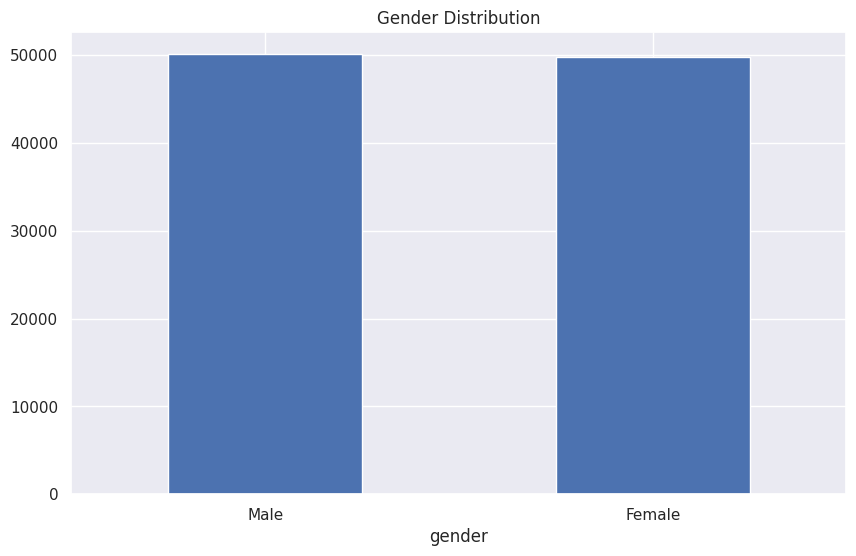

In [5]:
df['gender'].value_counts().plot(kind='bar', title='Gender Distribution', rot=0)
plt.show()

In [6]:
print("Missing values:")
display(df.isnull().sum())

Missing values:


id                   0
age                  0
gender               0
bmi                  0
daily_steps          0
sleep_hours          0
water_intake_l       0
calories_consumed    0
smoker               0
alcohol              0
resting_hr           0
systolic_bp          0
diastolic_bp         0
cholesterol          0
family_history       0
disease_risk         0
dtype: int64

In [7]:
print("Data duplicated")
display(df.duplicated().sum())

Data duplicated


0

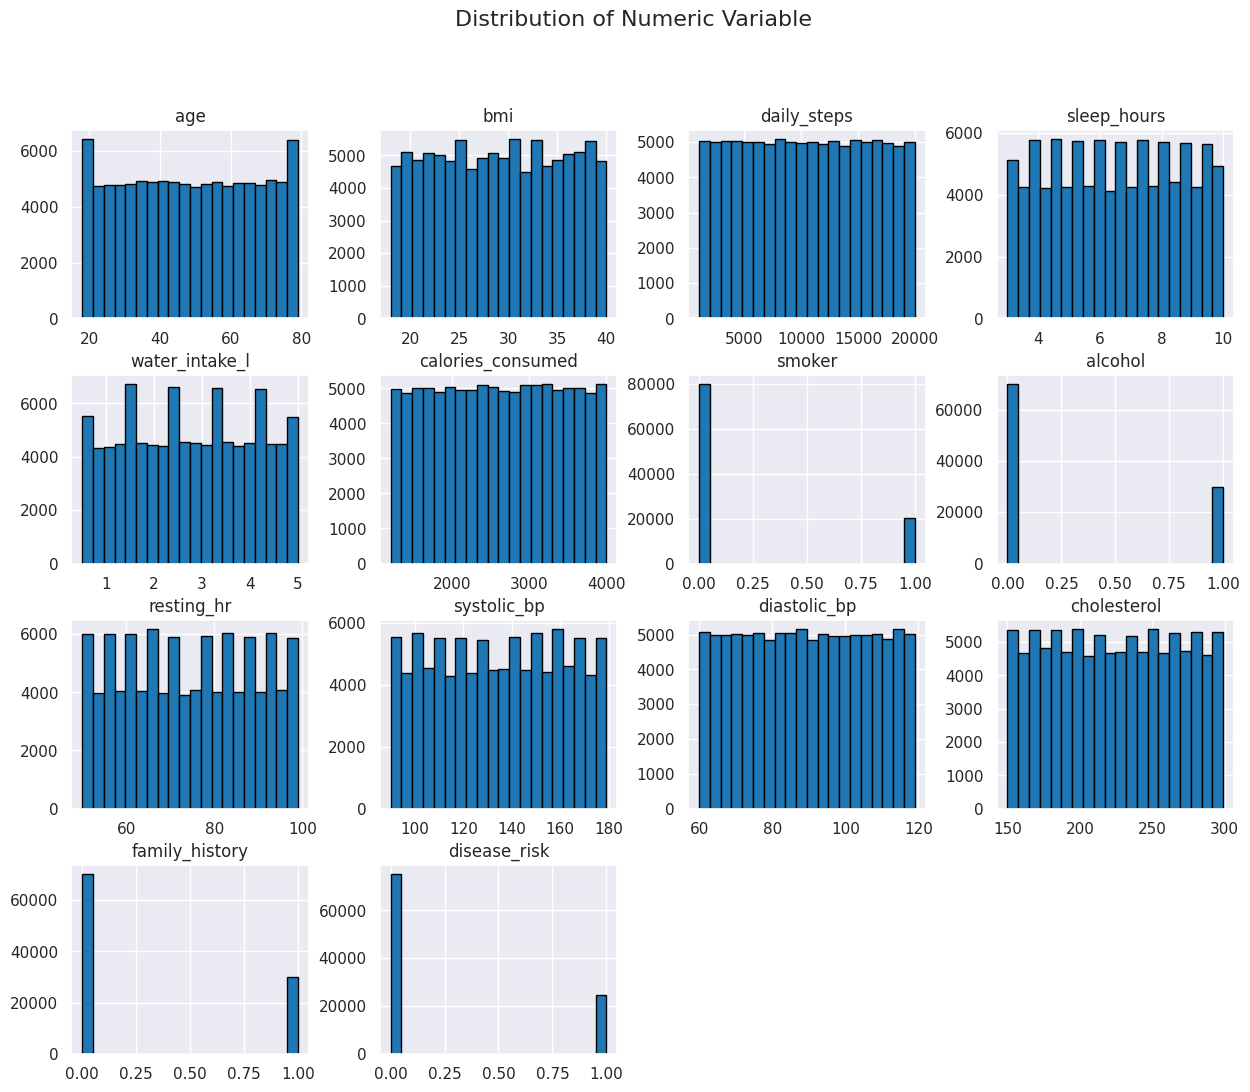

In [8]:
num_cols = df.select_dtypes(include=[np.number]).columns.drop(['id'])
df[num_cols].hist(bins=20, figsize=(15, 12), color='#1f77b4', edgecolor='black')
plt.suptitle('Distribution of Numeric Variable', fontsize=16)
plt.show()

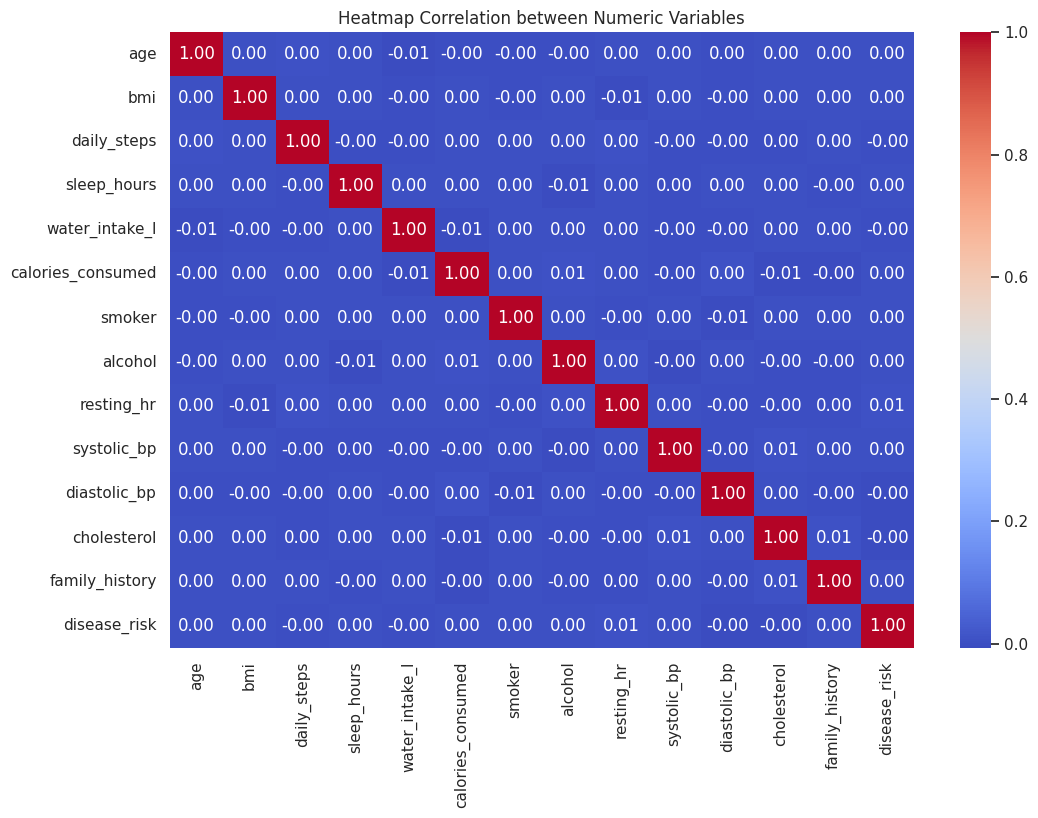

In [9]:
corr = df[num_cols].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Correlation between Numeric Variables')
plt.show()

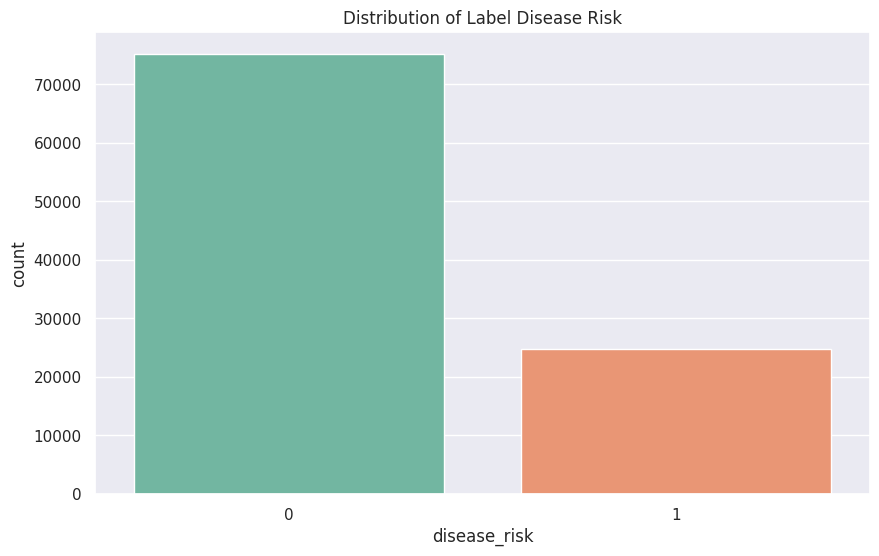

In [10]:
sns.countplot(data=df, x='disease_risk', palette='Set2')
plt.title('Distribution of Label Disease Risk')
plt.show()

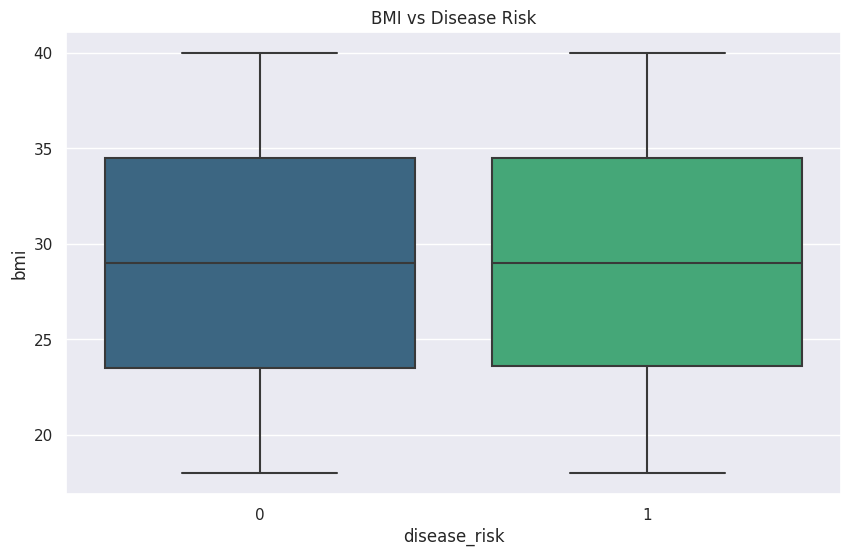

In [11]:
sns.boxplot(data=df, x='disease_risk', y='bmi', palette='viridis')
plt.title('BMI vs Disease Risk')
plt.show()

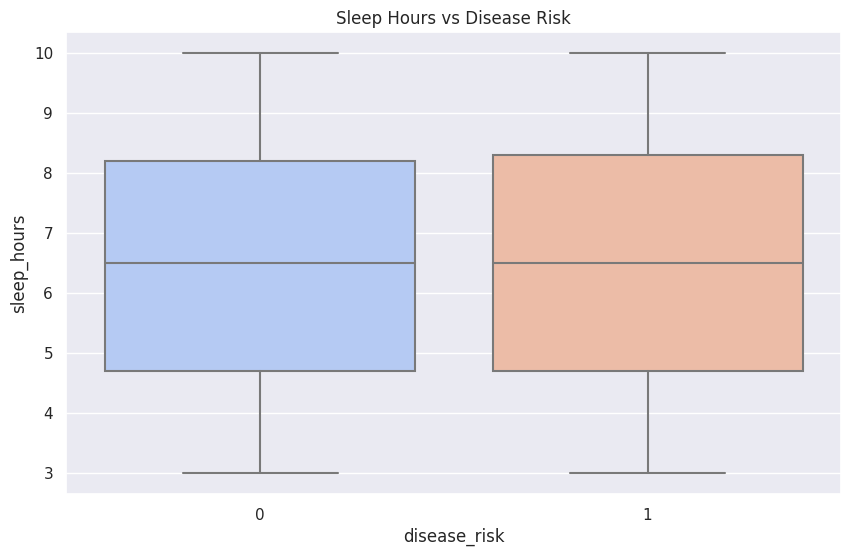

In [12]:
sns.boxplot(data=df, x='disease_risk', y='sleep_hours', palette='coolwarm')
plt.title('Sleep Hours vs Disease Risk')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


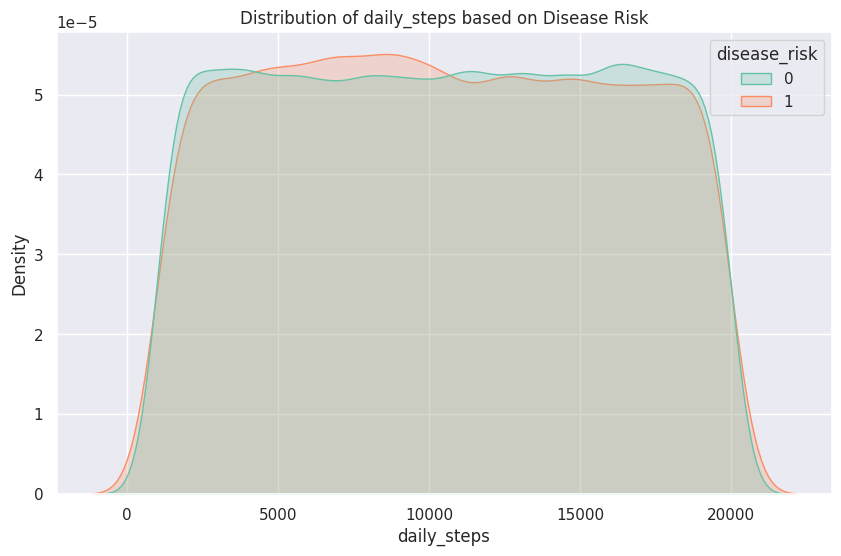

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


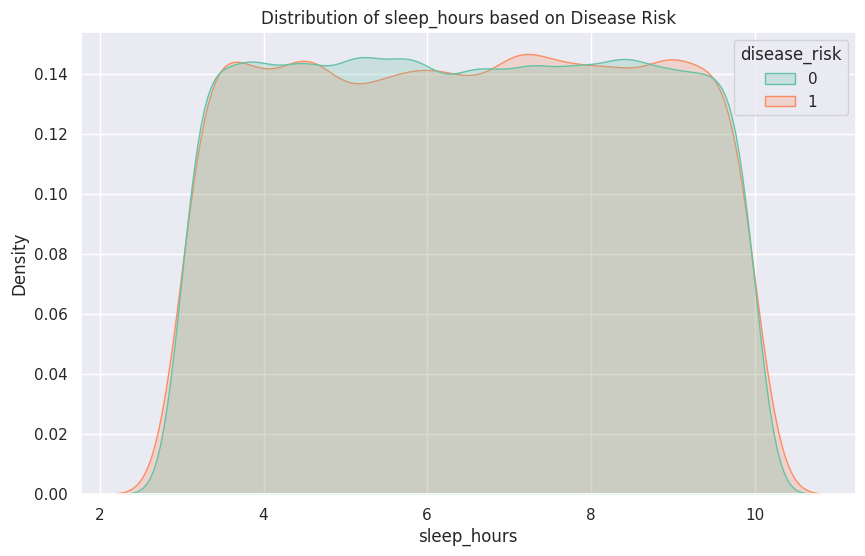

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


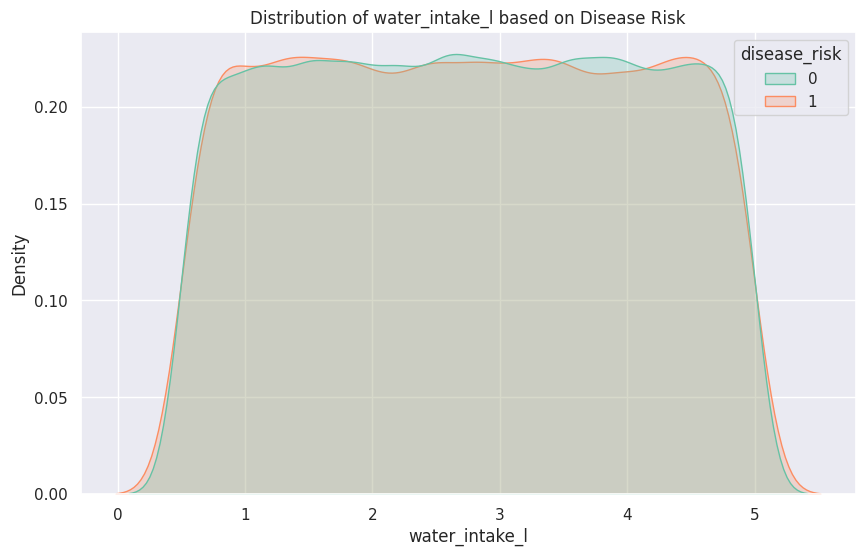

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


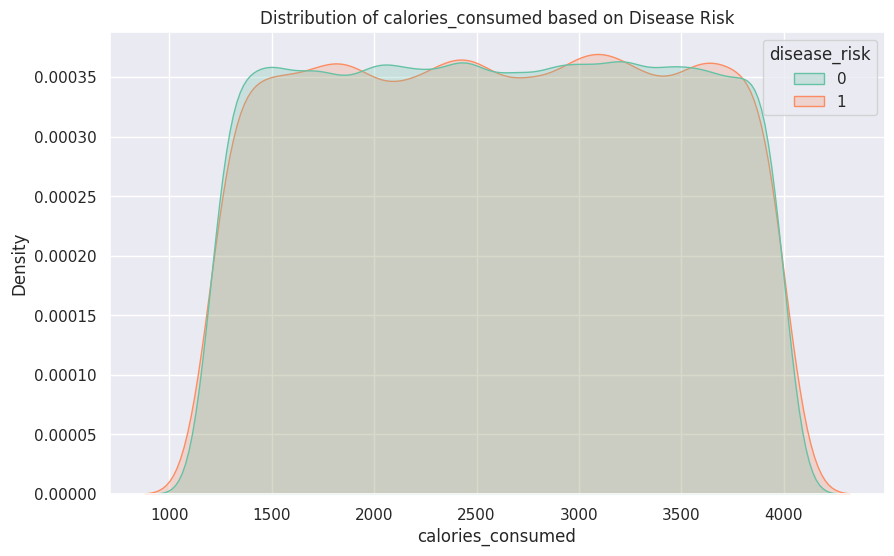

In [13]:
lifestyle_vars = ['daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed']
for col in lifestyle_vars:
    sns.kdeplot(data=df, x=col, hue='disease_risk', fill=True, common_norm=False, palette='Set2')
    plt.title(f"Distribution of {col} based on Disease Risk")
    plt.show()

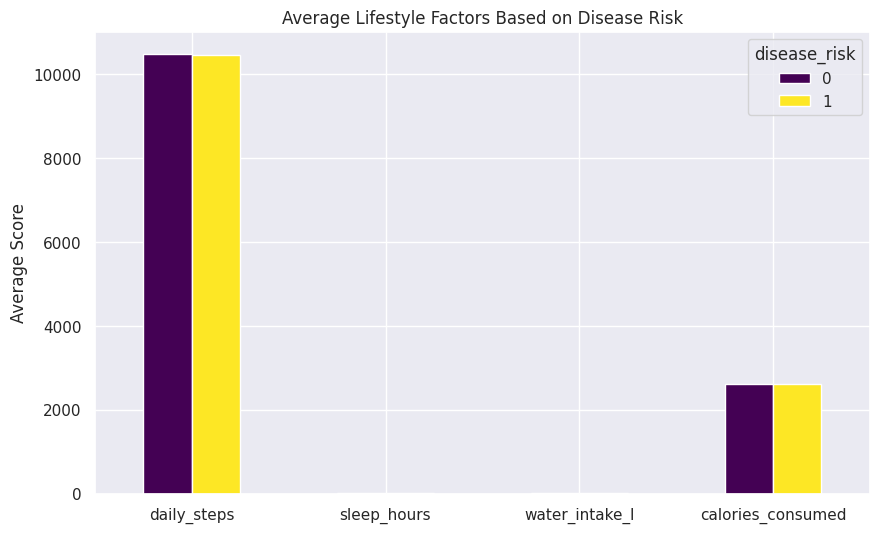

In [14]:
avg_lifestyle = df.groupby('disease_risk')[lifestyle_vars].mean().T
avg_lifestyle.plot(kind='bar', figsize=(10, 6), colormap='viridis', rot=0)
plt.title("Average Lifestyle Factors Based on Disease Risk")
plt.ylabel('Average Score')
plt.show()

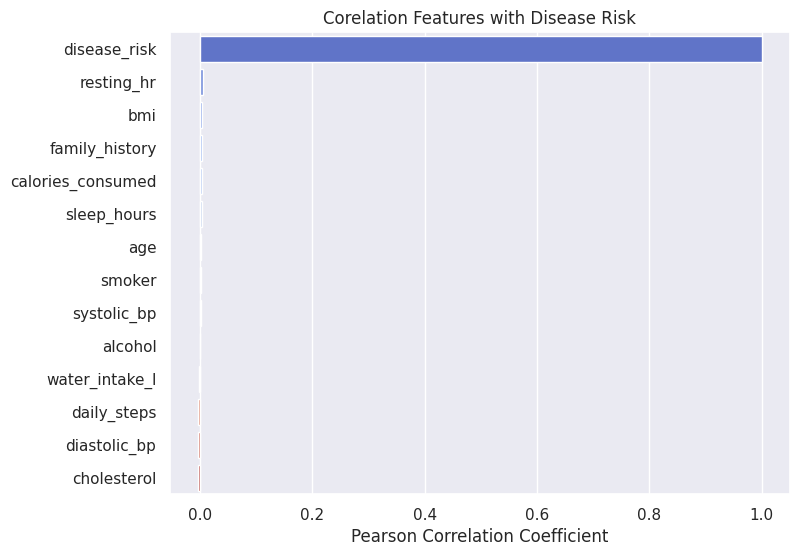

In [15]:
corr_with_risk = corr['disease_risk'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.barplot(x=corr_with_risk.values, y=corr_with_risk.index, palette='coolwarm')
plt.title('Corelation Features with Disease Risk')
plt.xlabel('Pearson Correlation Coefficient')
plt.show()

In [16]:
print("\n📈 Skewness and Kurtosis:")
for col in num_cols:
    skew_val = df[col].skew()
    kurt_val = df[col].kurt()
    print(f"{col:<20} | Skewness: {skew_val:>6.2f} | Kurtosis: {kurt_val:>6.2f}")



📈 Skewness and Kurtosis:
age                  | Skewness:   0.00 | Kurtosis:  -1.20
bmi                  | Skewness:  -0.00 | Kurtosis:  -1.20
daily_steps          | Skewness:   0.00 | Kurtosis:  -1.20
sleep_hours          | Skewness:   0.00 | Kurtosis:  -1.20
water_intake_l       | Skewness:  -0.00 | Kurtosis:  -1.19
calories_consumed    | Skewness:  -0.00 | Kurtosis:  -1.20
smoker               | Skewness:   1.49 | Kurtosis:   0.23
alcohol              | Skewness:   0.87 | Kurtosis:  -1.24
resting_hr           | Skewness:   0.00 | Kurtosis:  -1.20
systolic_bp          | Skewness:  -0.01 | Kurtosis:  -1.20
diastolic_bp         | Skewness:   0.00 | Kurtosis:  -1.20
cholesterol          | Skewness:   0.01 | Kurtosis:  -1.20
family_history       | Skewness:   0.88 | Kurtosis:  -1.23
disease_risk         | Skewness:   1.17 | Kurtosis:  -0.64


In [17]:
z_scores = np.abs(stats.zscore(df[num_cols]))
outlier_mask = (z_scores > 3)

outlier_percent = (outlier_mask.sum() / len(df)) * 100
print("\n🚨 Percentage of Outliers per Feature (Z-Score > 3):")
print(outlier_percent)


🚨 Percentage of Outliers per Feature (Z-Score > 3):
0.0


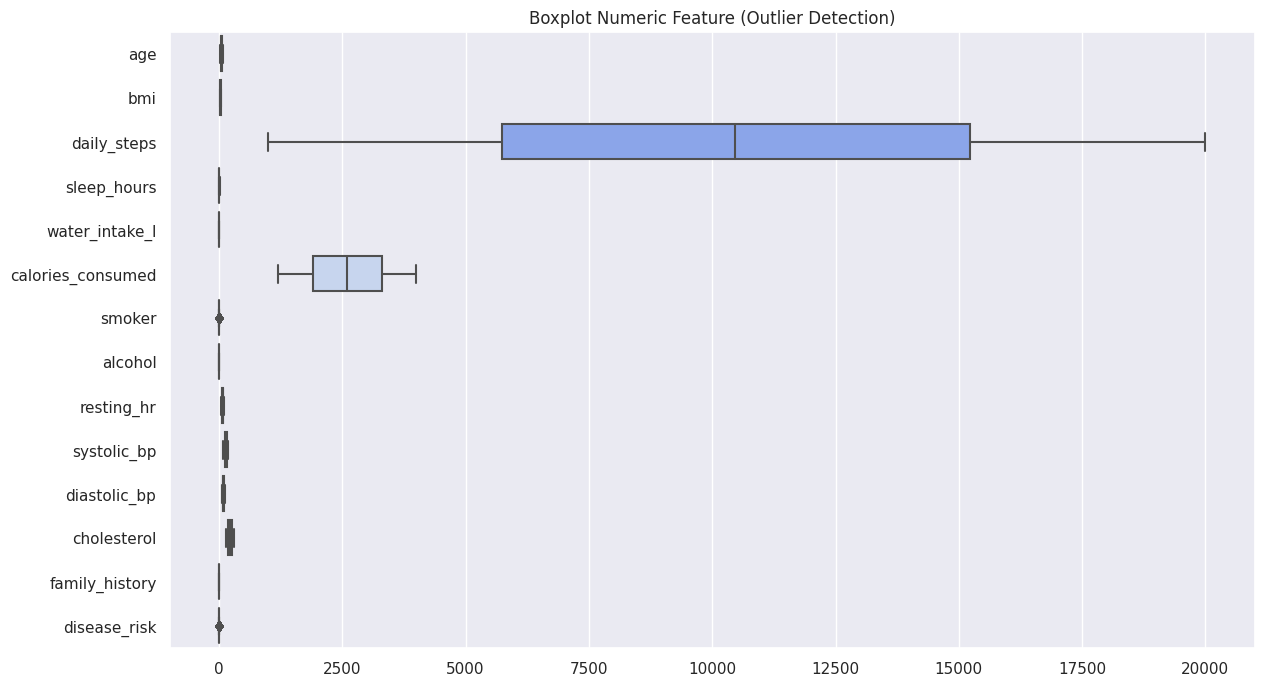

In [18]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df[num_cols], orient='h', palette='coolwarm')
plt.title('Boxplot Numeric Feature (Outlier Detection)')
plt.show()

In [19]:
def detect_outliers_iqr(data, feature):
    q1 = data[feature].quantile(.25)
    q3 = data[feature].quantile(.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    return data[(data[feature] < lower) | (data[feature] > upper)]

iqr_outliers = {}
for col in num_cols:
    outliers_col = detect_outliers_iqr(df, col)
    iqr_outliers[col] = len(outliers_col)

iqr_outliers_df = pd.DataFrame(list(iqr_outliers.items()), columns=['Feature', 'Outlier_Count'])
iqr_outliers_df['Outlier_%'] = (iqr_outliers_df['Outlier_Count'] / len(df)) * 100
iqr_outliers_df.sort_values(by='Outlier_%', ascending=False, inplace=True)


print("\n📊 Total outlier based on IQR:")
display(iqr_outliers_df)


📊 Total outlier based on IQR:


Feature  Outlier_Count  Outlier_%
13       disease_risk          24821     24.821
6              smoker          20094     20.094
0                 age              0      0.000
1                 bmi              0      0.000
2         daily_steps              0      0.000
3         sleep_hours              0      0.000
4      water_intake_l              0      0.000
5   calories_consumed              0      0.000
7             alcohol              0      0.000
8          resting_hr              0      0.000
9         systolic_bp              0      0.000
10       diastolic_bp              0      0.000
11        cholesterol              0      0.000
12     family_history              0      0.000

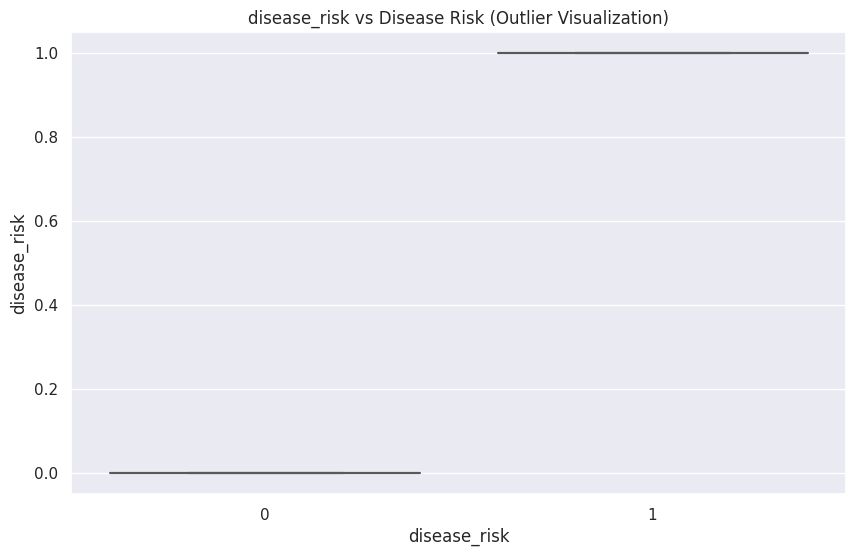

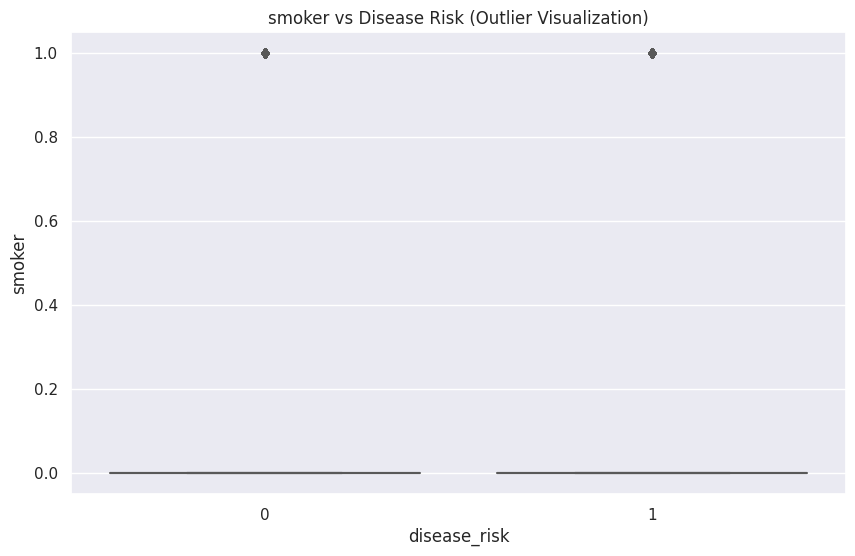

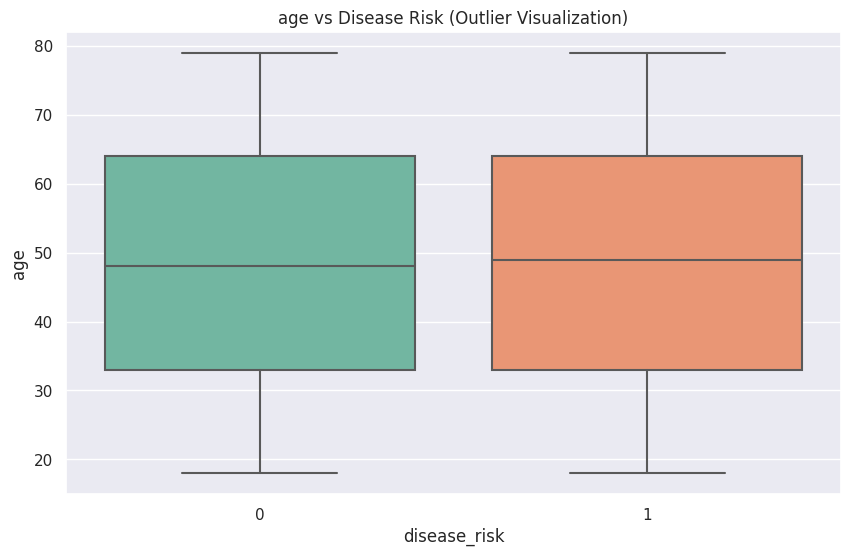

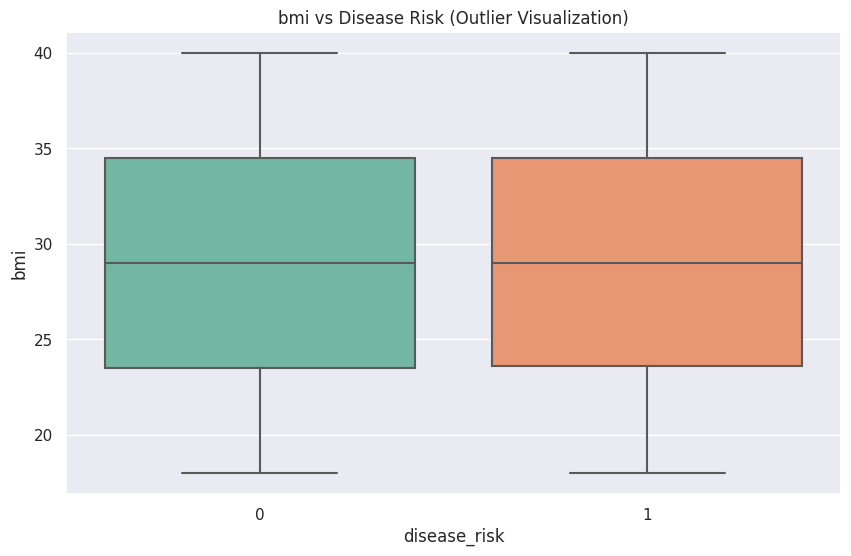

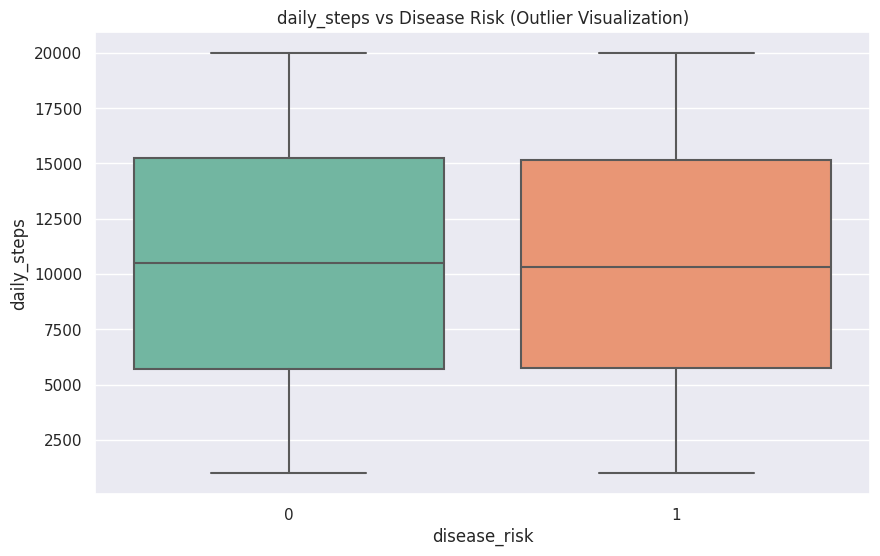

In [20]:
top_outliers = iqr_outliers_df.head(5)['Feature']
for col in top_outliers:
    sns.boxplot(data=df, x='disease_risk', y=col, palette='Set2')
    plt.title(f"{col} vs Disease Risk (Outlier Visualization)")
    plt.show()

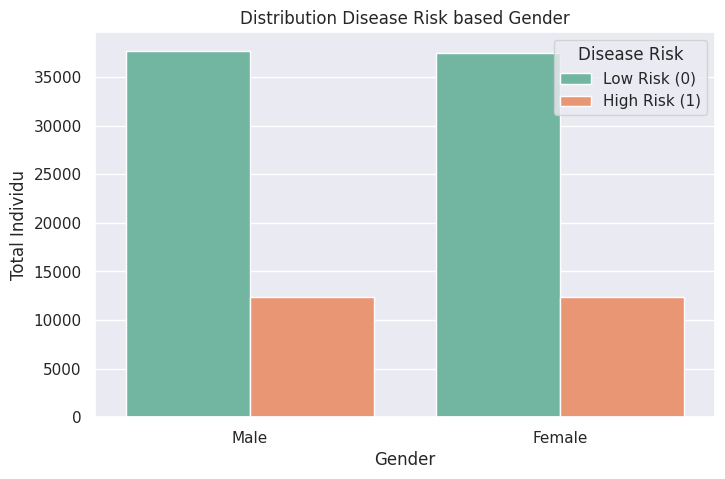

In [21]:
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='gender', hue='disease_risk', palette='Set2')
plt.title('Distribution Disease Risk based Gender')
plt.xlabel('Gender')
plt.ylabel('Total Individu')
plt.legend(title='Disease Risk', labels=['Low Risk (0)', 'High Risk (1)'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

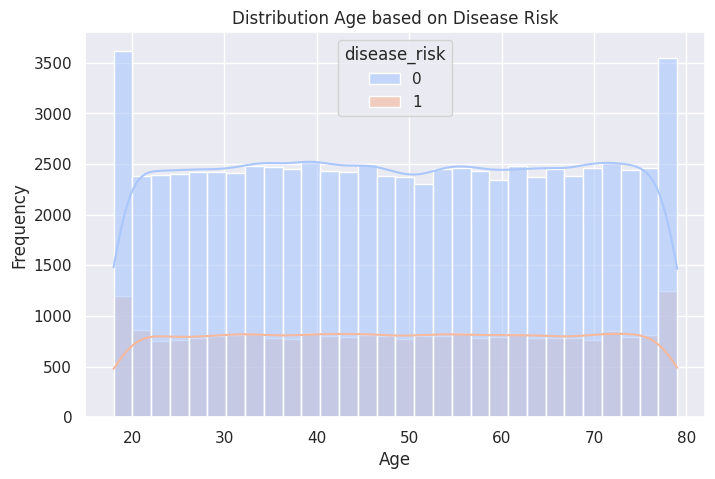

In [22]:
plt.figure(figsize=(8, 5))
sns.histplot(data=df, x='age', hue='disease_risk', bins=30, kde=True, palette='coolwarm', alpha=0.6)
plt.title("Distribution Age based on Disease Risk")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

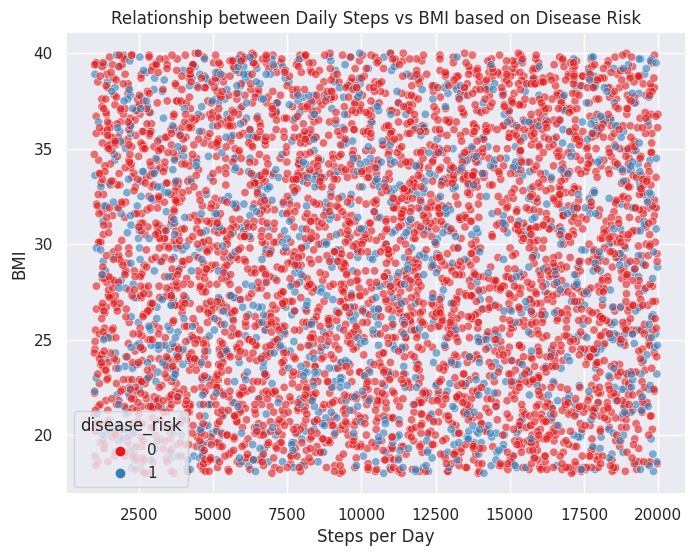

In [23]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=df.sample(5000), x='daily_steps', y='bmi', hue='disease_risk', alpha=0.6, palette='Set1')
plt.title('Relationship between Daily Steps vs BMI based on Disease Risk')
plt.xlabel('Steps per Day')
plt.ylabel('BMI')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3544: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the mark

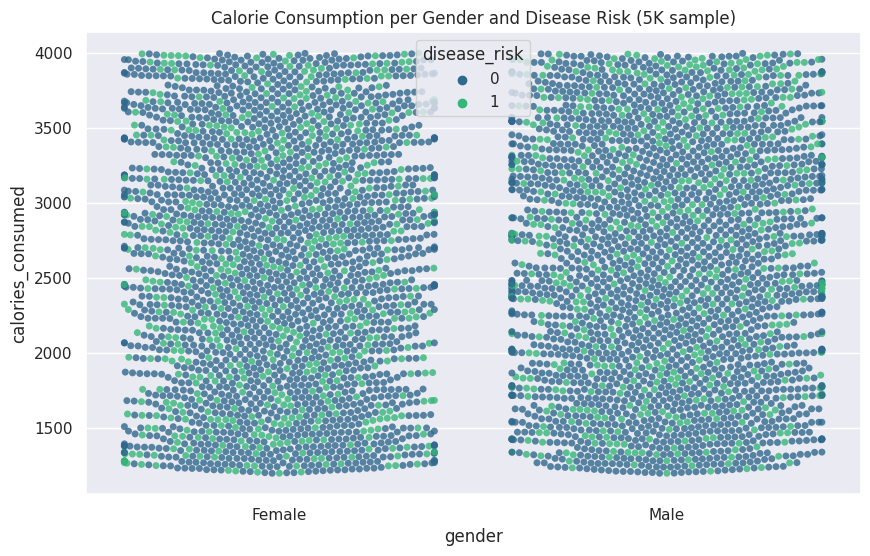

In [24]:
plt.figure(figsize=(10, 6))
sns.swarmplot(data=df.sample(5000), x='gender', y='calories_consumed', hue='disease_risk', palette='viridis', alpha=0.8)
plt.title('Calorie Consumption per Gender and Disease Risk (5K sample)')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

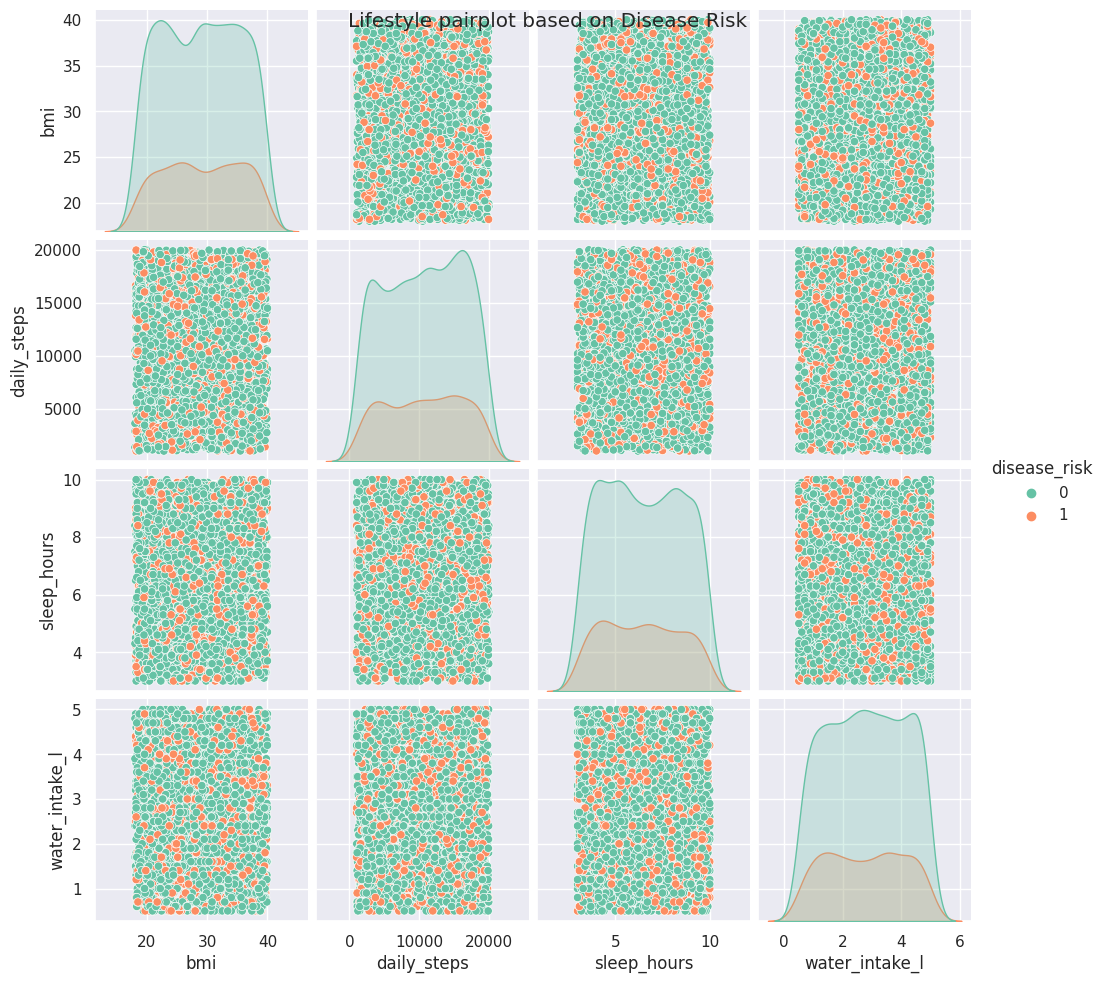

In [25]:
sample_df = df.sample(3000, random_state=42)
sns.pairplot(sample_df, vars=['bmi', 'daily_steps', 'sleep_hours', 'water_intake_l'],
            hue='disease_risk', palette='Set2', diag_kind='kde')
plt.suptitle('Lifestyle pairplot based on Disease Risk')
plt.show()

In [26]:
bins = [0, 18, 30, 45, 60, 75, 100]
labels = ['<18', '18-30', '31-45', '46-60', '61-75', '75+']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

print('\nDistribution of the number of individuals per age group:')
display(df['age_group'].value_counts().sort_index())


Distribution of the number of individuals per age group:


age_group
<18          0
18-30    19146
31-45    24455
46-60    24130
61-75    24199
75+       8070
Name: count, dtype: int64

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


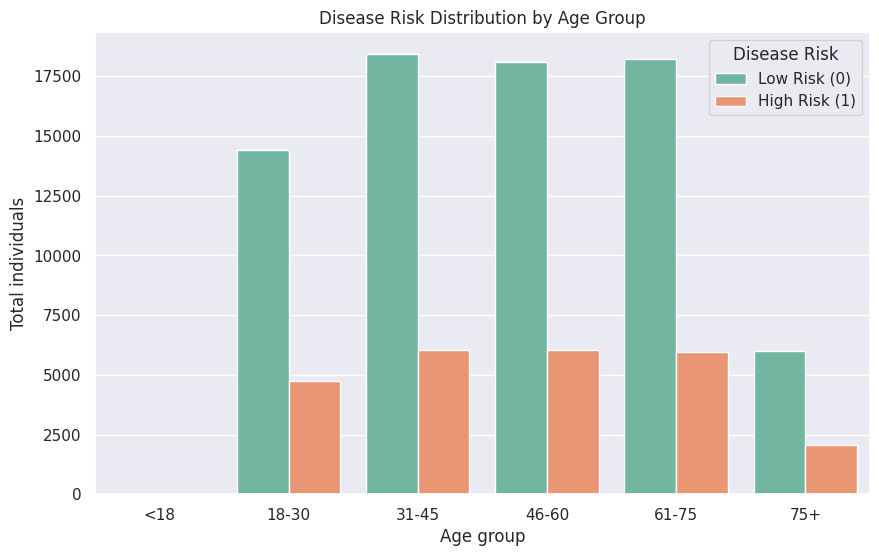

In [27]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age_group', hue='disease_risk', palette='Set2')
plt.title('Disease Risk Distribution by Age Group')
plt.xlabel('Age group')
plt.ylabel('Total individuals')
plt.legend(title='Disease Risk', labels=['Low Risk (0)', 'High Risk (1)'])
plt.show()

/tmp/ipykernel_37/1917159311.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_health = df.groupby('age_group')[health_features].mean().round(2)
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


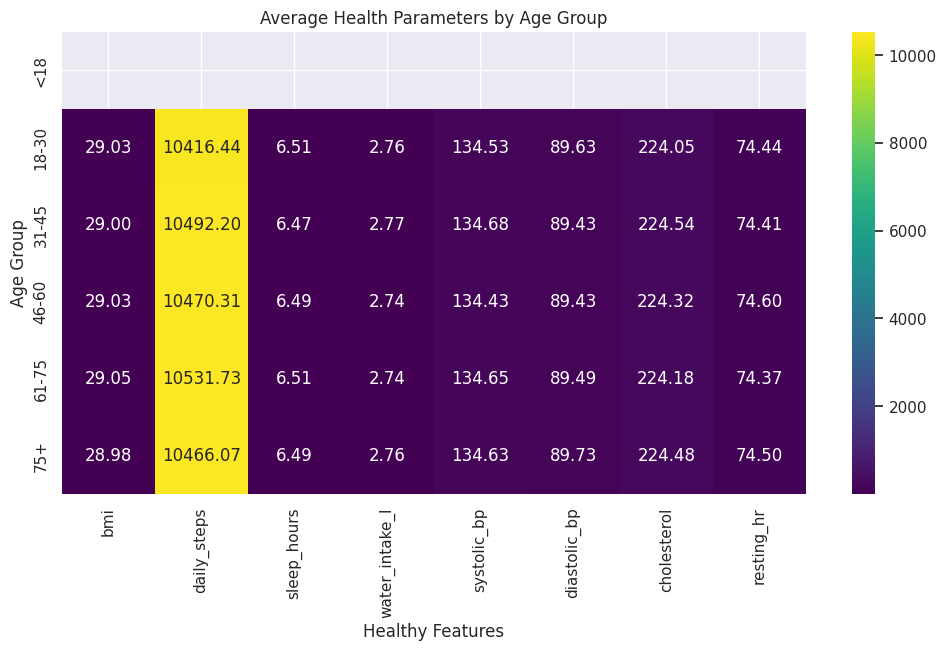

In [28]:
health_features = ['bmi', 'daily_steps', 'sleep_hours', 'water_intake_l', 
                   'systolic_bp', 'diastolic_bp', 'cholesterol', 'resting_hr']

age_health = df.groupby('age_group')[health_features].mean().round(2)

plt.figure(figsize=(12, 6))
sns.heatmap(age_health, annot=True, cmap='viridis', fmt='.2f')
plt.title('Average Health Parameters by Age Group')
plt.ylabel('Age Group')
plt.xlabel('Healthy Features')
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

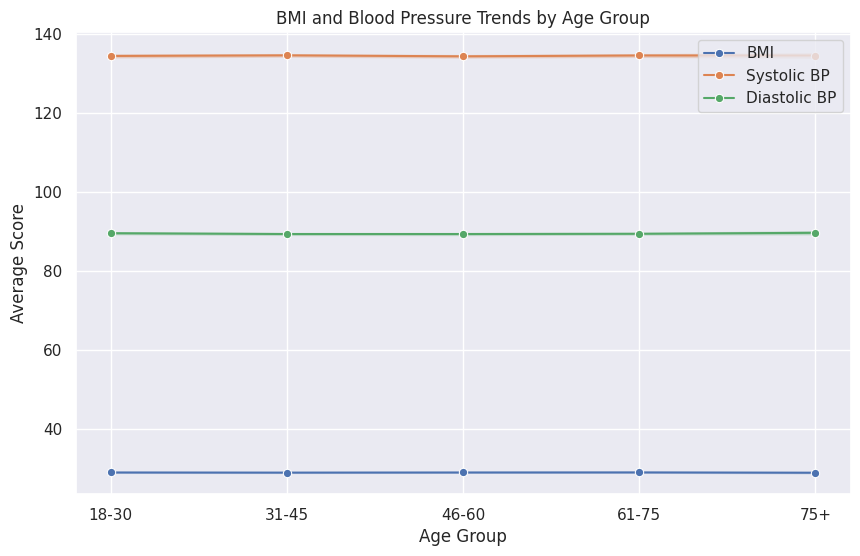

In [29]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='age_group', y='bmi', estimator='mean', label='BMI', marker='o')
sns.lineplot(data=df, x='age_group', y='systolic_bp', estimator='mean', label='Systolic BP', marker='o')
sns.lineplot(data=df, x='age_group', y='diastolic_bp', estimator='mean', label='Diastolic BP', marker='o')
plt.title("BMI and Blood Pressure Trends by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Average Score")
plt.legend()
plt.show()


/tmp/ipykernel_37/1677442359.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='age_group', y='daily_steps', hue='disease_risk', ci=None, palette='coolwarm')
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


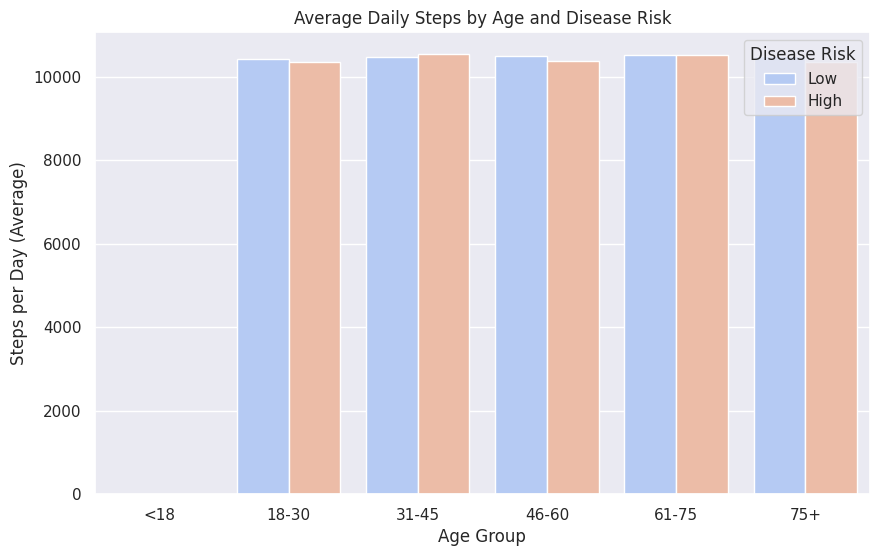

In [30]:
plt.figure(figsize=(10,6))
sns.barplot(data=df, x='age_group', y='daily_steps', hue='disease_risk', ci=None, palette='coolwarm')
plt.title('Average Daily Steps by Age and Disease Risk')
plt.xlabel('Age Group')
plt.ylabel('Steps per Day (Average)')
plt.legend(title='Disease Risk', labels=['Low', 'High'])
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


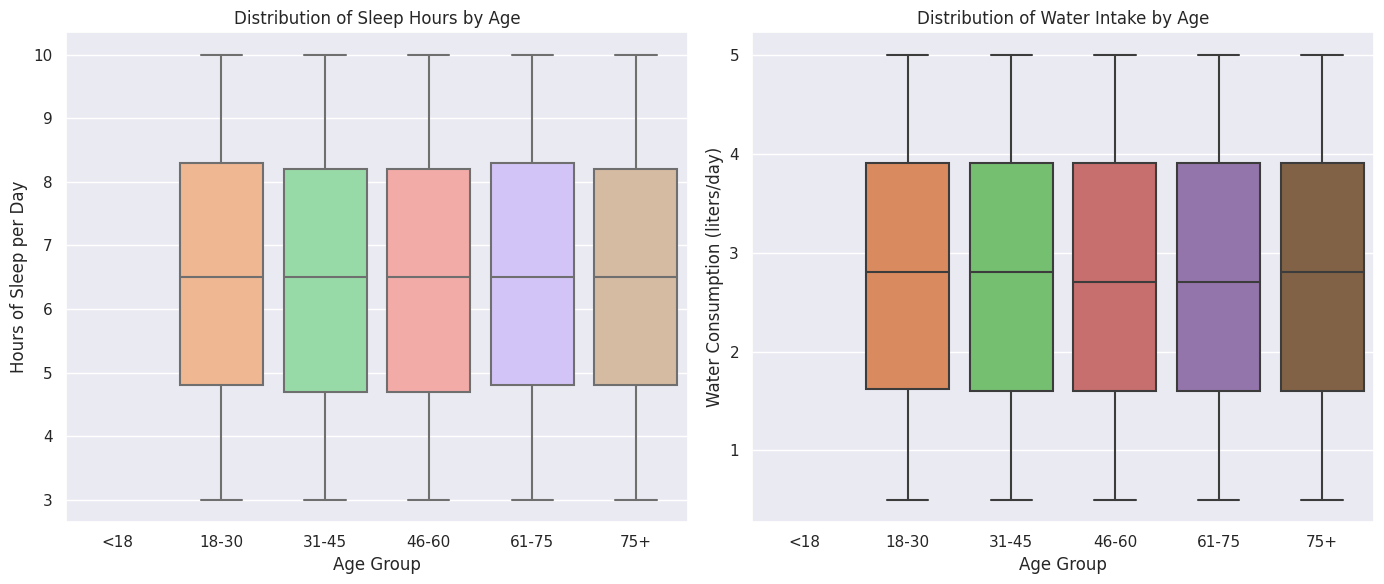

In [31]:
fig, axes = plt.subplots(1, 2, figsize=(14,6))

sns.boxplot(data=df, x='age_group', y='sleep_hours', ax=axes[0], palette='pastel')
axes[0].set_title("Distribution of Sleep Hours by Age")
axes[0].set_xlabel("Age Group")
axes[0].set_ylabel("Hours of Sleep per Day")

sns.boxplot(data=df, x='age_group', y='water_intake_l', ax=axes[1], palette='muted')
axes[1].set_title("Distribution of Water Intake by Age")
axes[1].set_xlabel("Age Group")
axes[1].set_ylabel("Water Consumption (liters/day)")

plt.tight_layout()
plt.show()

# Modeling

## 1. Disease Risk (Classification)

- Objective: Predict the disease_risk column based on lifestyle and medical data

In [32]:
df_model = df.copy().drop(columns=['age_group'])

le = LabelEncoder()
df_model['gender'] = le.fit_transform(df_model['gender']) # Male=1, Female=0

X = df_model.drop(columns=['id', 'disease_risk'])
y = df_model['disease_risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Distribution of train before oversample:")
print(y_train.value_counts(normalize=True).round(3))

# Oversampling manual (random oversampling) in train set 
train_df = X_train.copy()
train_df['disease_risk'] = y_train.values

counts = train_df['disease_risk'].value_counts()
n_max = counts.max()

rng = 42
parts = []
for cls, n in counts.items():
    part = train_df[train_df['disease_risk'] == cls]
    part_over = part.sample(n_max, replace=True, random_state=rng)
    parts.append(part_over)

train_bal = pd.concat(parts, axis=0).sample(frac=1.0, random_state=rng).reset_index(drop=True)
X_train_bal = train_bal.drop(columns=['disease_risk'])
y_train_bal = train_bal['disease_risk']

print("Distribution of train after oversample:")
print(y_train_bal.value_counts(normalize=True).round(3))

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_bal)
X_test_scaled = scaler.transform(X_test)


Distribution of train before oversample:
disease_risk
0    0.752
1    0.248
Name: proportion, dtype: float64
Distribution of train after oversample:
disease_risk
1    0.5
0    0.5
Name: proportion, dtype: float64



=== Logistic Regression ===
Accuracy: 0.5034 | ROC-AUC: 0.5044
Classification report:
              precision    recall  f1-score   support

           0     0.7538    0.5041    0.6041     15036
           1     0.2503    0.5014    0.3339      4964

    accuracy                         0.5034     20000
   macro avg     0.5020    0.5027    0.4690     20000
weighted avg     0.6288    0.5034    0.5371     20000



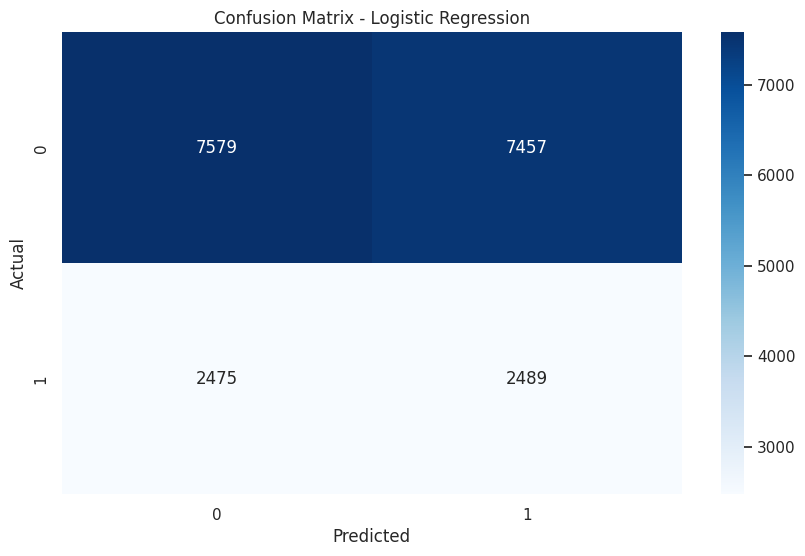


=== Random Forest ===
Accuracy: 0.7464 | ROC-AUC: 0.4964
Classification report:
              precision    recall  f1-score   support

           0     0.7515    0.9900    0.8544     15036
           1     0.2216    0.0087    0.0167      4964

    accuracy                         0.7464     20000
   macro avg     0.4866    0.4993    0.4356     20000
weighted avg     0.6200    0.7464    0.6465     20000



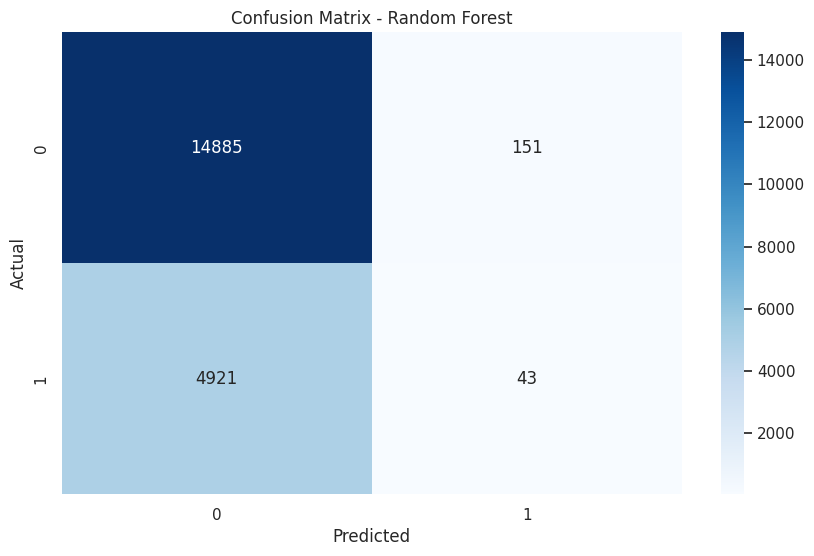


=== XGBoost ===
Accuracy: 0.5351 | ROC-AUC: 0.4948
Classification report:
              precision    recall  f1-score   support

           0     0.7509    0.5709    0.6487     15036
           1     0.2471    0.4265    0.3129      4964

    accuracy                         0.5351     20000
   macro avg     0.4990    0.4987    0.4808     20000
weighted avg     0.6259    0.5351    0.5653     20000



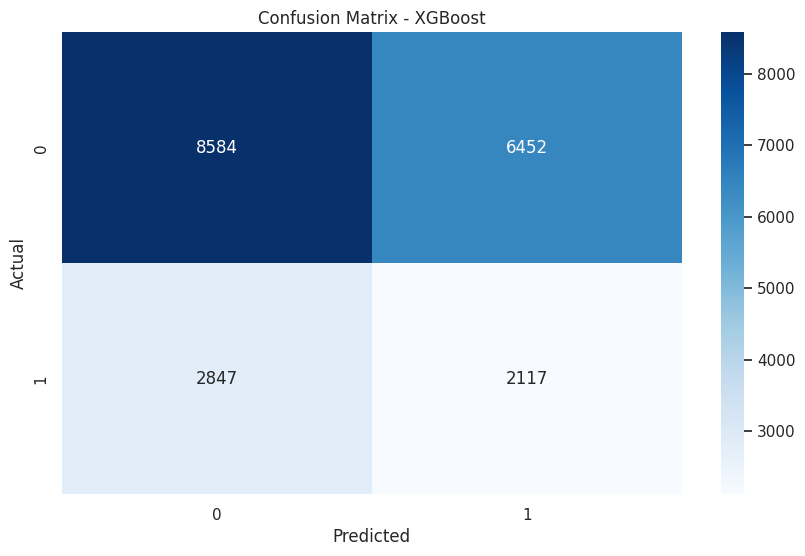

In [33]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced'),
    'Random Forest': RandomForestClassifier(n_estimators=300, random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(
         n_estimators=400, max_depth=5, learning_rate=0.05, subsample=0.9, colsample_bytree=0.9,
        random_state=42, eval_metric='logloss', use_label_encoder=False
    )
}

results_acc, results_auc, preds, probs = {}, {}, {}, {}

for name, model in models.items():
    
    model.fit(X_train_scaled, y_train_bal)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    preds[name] = y_pred
    probs[name] = y_proba
    
    acc = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_proba)
    results_acc[name] = acc
    results_auc[name] = auc 
    
    print(f"\n=== {name} ===")
    print(f"Accuracy: {acc:.4f} | ROC-AUC: {auc:.4f}")
    print("Classification report:")
    print(classification_report(y_test, y_pred, digits=4))

    # confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


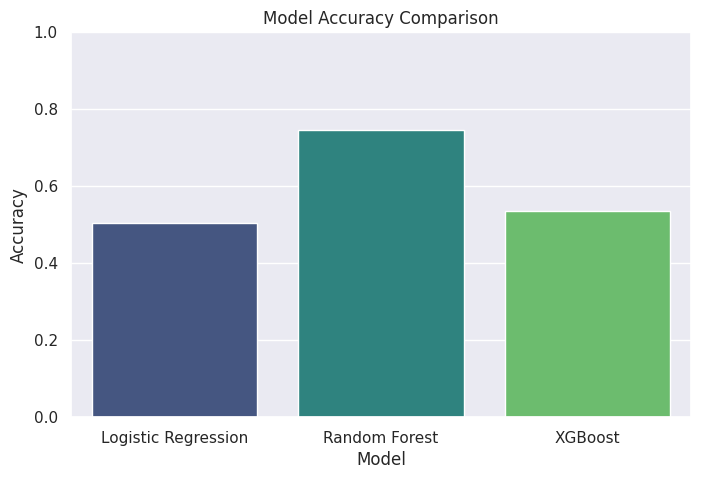

In [34]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results_acc.keys()), y=list(results_acc.values()), palette='viridis')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.ylim(0, 1)
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


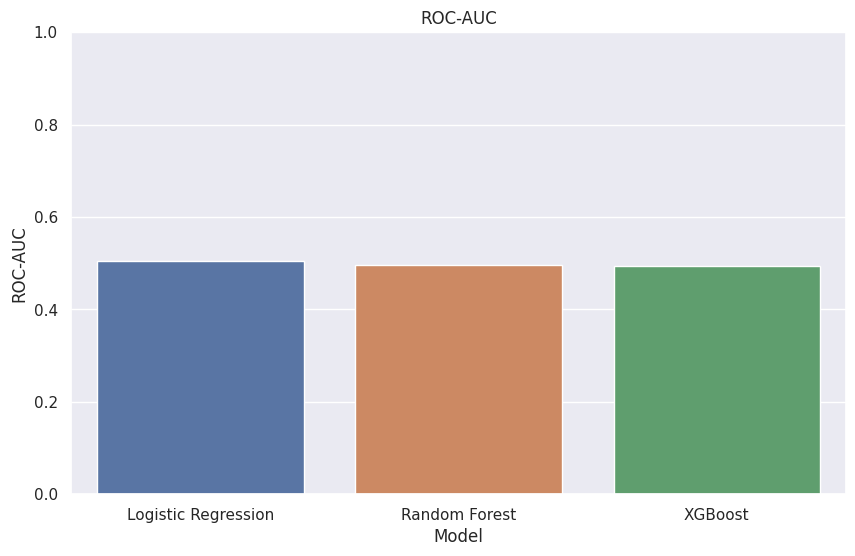

In [35]:
plt.figure()
sns.barplot(x=list(results_auc.keys()), y=list(results_auc.values()))
plt.title('ROC-AUC')
plt.ylim(0, 1)
plt.ylabel('ROC-AUC')
plt.xlabel('Model')
plt.show()

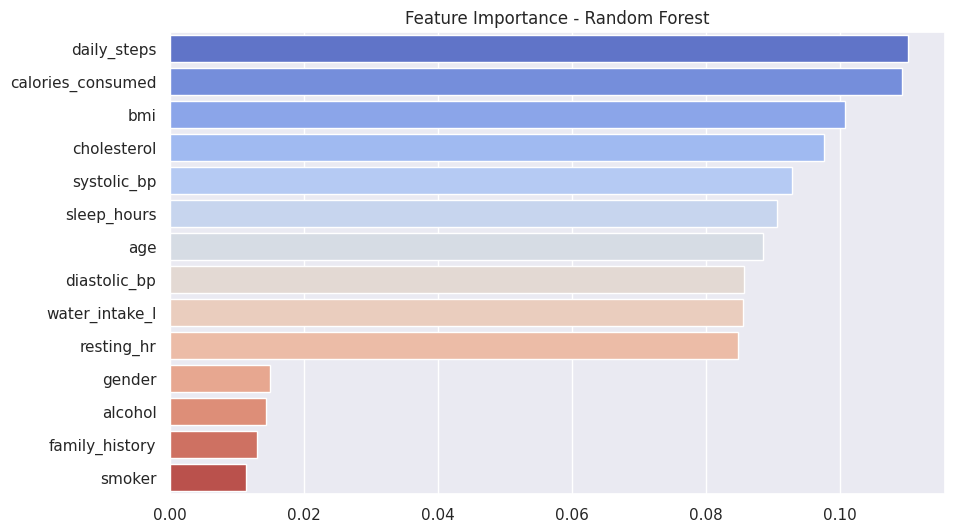

In [36]:
rf_model = models['Random Forest']
xgb_model = models['XGBoost']

rf_importance = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_importance.values, y=rf_importance.index, palette='coolwarm')
plt.title('Feature Importance - Random Forest')
plt.show()

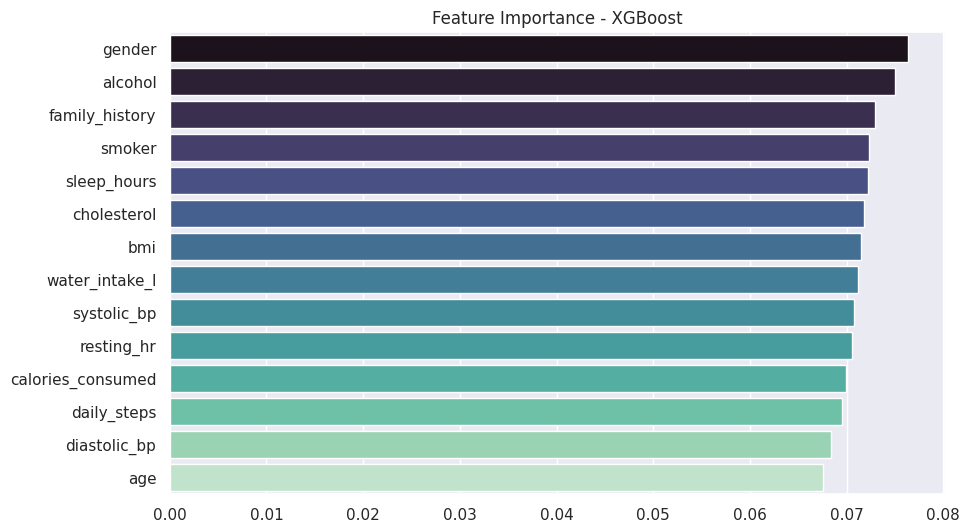

In [37]:
xgb_importance = pd.Series(xgb_model.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=xgb_importance.values, y=xgb_importance.index, palette='mako')
plt.title('Feature Importance - XGBoost')
plt.show()

In [38]:
best_model_name = max(results_auc, key=results_auc.get)
print(f"\nModel terbaik (ROC-AUC): {best_model_name} | AUC={results_auc[best_model_name]:.4f}")



Model terbaik (ROC-AUC): Logistic Regression | AUC=0.5044


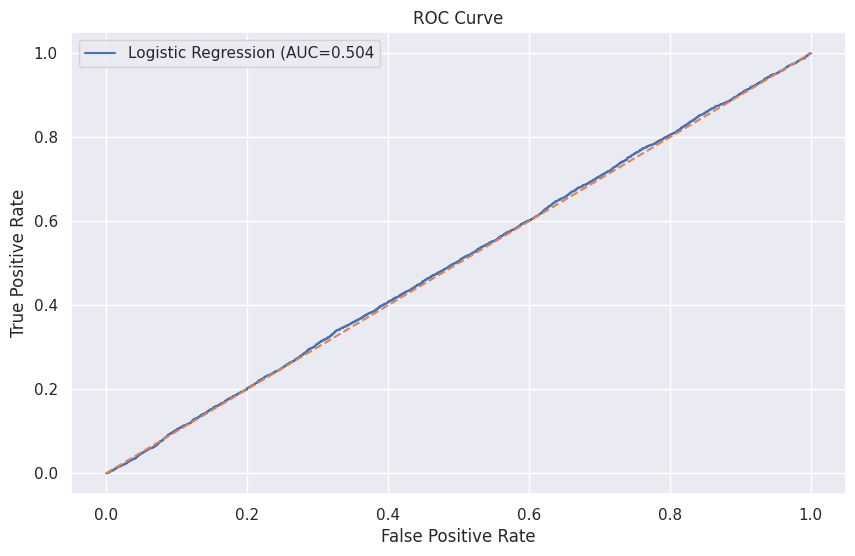

In [39]:
fpr, tpr, _ = roc_curve(y_test, probs[best_model_name])
plt.figure()
plt.plot(fpr, tpr, label=f"{best_model_name} (AUC={results_auc[best_model_name]:.3f}")
plt.plot([0,1], [0,1], '--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


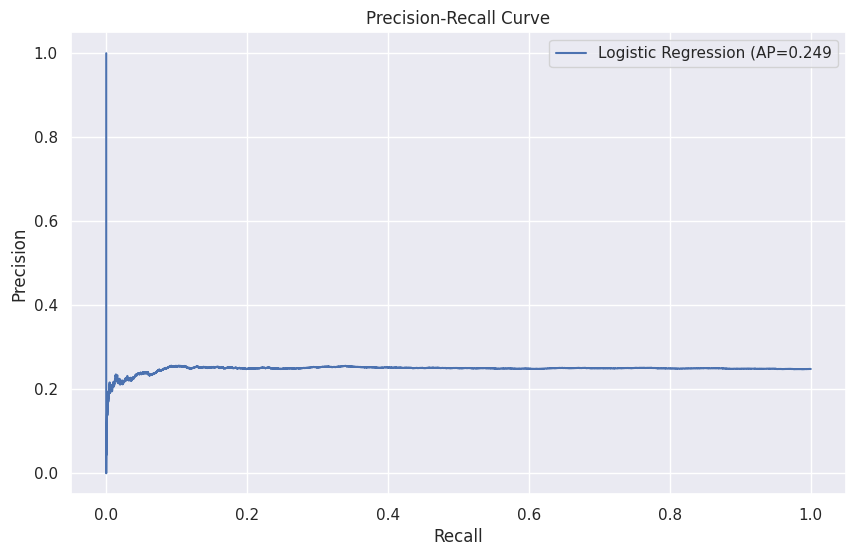

In [40]:
precision, recall, thresholds = precision_recall_curve(y_test, probs[best_model_name])
ap = average_precision_score(y_test, probs[best_model_name])
plt.figure()
plt.plot(recall, precision, label=f"{best_model_name} (AP={ap:.3f}")
plt.title('Precision-Recall Curve')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

In [41]:
best_thr, best_f1 = 0.5, -1
for thr in np.linspace(0.05, 0.95, 19):
    y_thr = (probs[best_model_name] >= thr).astype(int)
    f1 = f1_score(y_test, y_thr)
    if f1 > best_f1:
        best_f1, best_thr = f1, thr

print(f"\nBest Threshold based F1: {best_thr:.2f} | F1={best_f1:.4f}")
y_best = (probs[best_model_name] >= best_thr).astype(int)
print("Classification Report @Best Threshold:")
print(classification_report(y_test, y_best, digits=4))


Best Threshold based F1: 0.05 | F1=0.3977
Classification Report @Best Threshold:
              precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     15036
           1     0.2482    1.0000    0.3977      4964

    accuracy                         0.2482     20000
   macro avg     0.1241    0.5000    0.1988     20000
weighted avg     0.0616    0.2482    0.0987     20000



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Clustering Lifestyle

In [42]:
df_cluster = df.copy().drop(columns=['age_group'])

le = LabelEncoder()
df_cluster['gender'] = le.fit_transform(df_cluster['gender'])

X = df_cluster.drop(columns=['id', 'disease_risk'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [55]:
inertia = []
silhouette = []
K = range(2, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    silhouette.append(silhouette_score(X_scaled, kmeans.labels_))


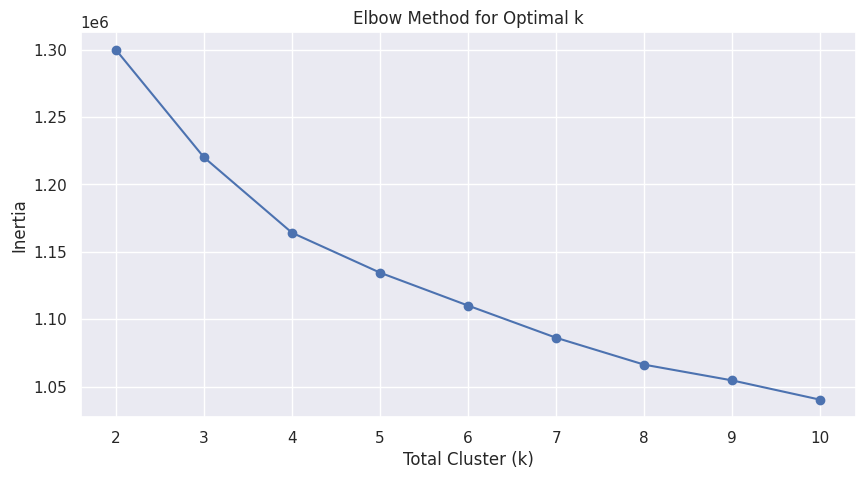

In [44]:
plt.figure(figsize=(10,5))
plt.plot(K, inertia, 'bo-')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Total Cluster (k)')
plt.ylabel('Inertia')
plt.show()

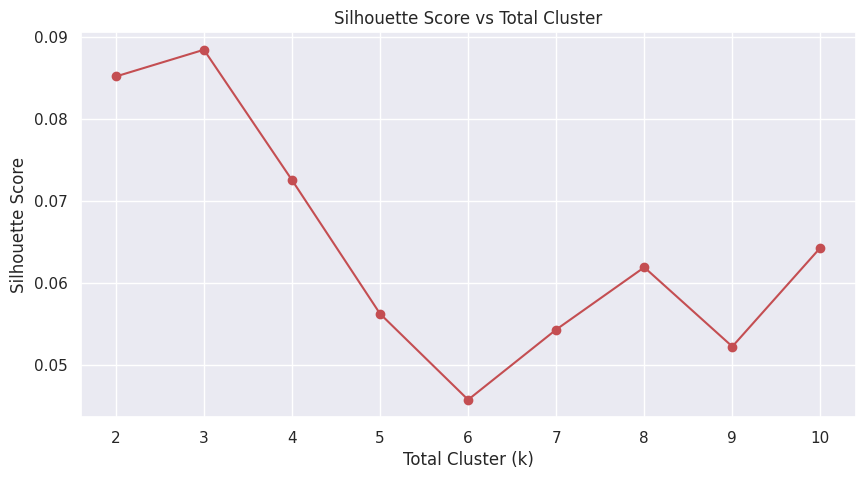

In [45]:
plt.figure(figsize=(10,5))
plt.plot(K, silhouette, 'ro-')
plt.title('Silhouette Score vs Total Cluster')
plt.xlabel('Total Cluster (k)')
plt.ylabel('Silhouette Score')
plt.show()

In [46]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)

df_cluster['cluster'] = clusters

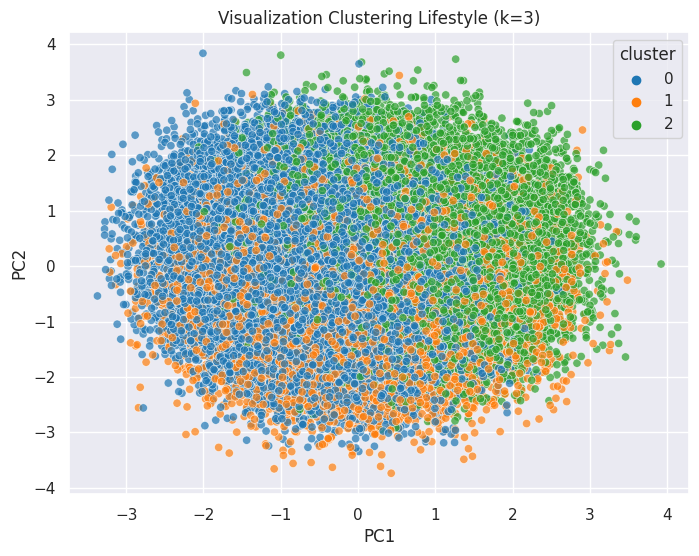

In [47]:
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['cluster'] = clusters

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='cluster', palette='tab10', alpha=0.7)
plt.title(f'Visualization Clustering Lifestyle (k={optimal_k})')
plt.show()

In [48]:
cluster_summary = df_cluster.drop(columns=['id']).groupby('cluster').mean(numeric_only=True)
print("\nAverage feature per cluster:")
display(cluster_summary)


Average feature per cluster:


age    gender        bmi   daily_steps  sleep_hours  \
cluster                                                              
0        48.545250  0.500983  29.021662  10470.929026     6.500468   
1        48.438439  0.498407  28.981641  10484.820842     6.496039   
2        48.554455  0.504555  29.068343  10496.630475     6.467895   

         water_intake_l  calories_consumed  smoker   alcohol  resting_hr  \
cluster                                                                    
0              2.746431        2598.563900     0.0  0.000000   74.401122   
1              2.755519        2606.920374     1.0  0.302279   74.416045   
2              2.759967        2611.511702     0.0  1.000000   74.623872   

         systolic_bp  diastolic_bp  cholesterol  family_history  disease_risk  
cluster                                                                        
0         134.608900     89.568831   224.362785        0.299189      0.247651  
1         134.769633     89.255250   224.386931        0.301632      0.249179  
2         134.355776     89.581494   224.082748        0.296974      0.248704

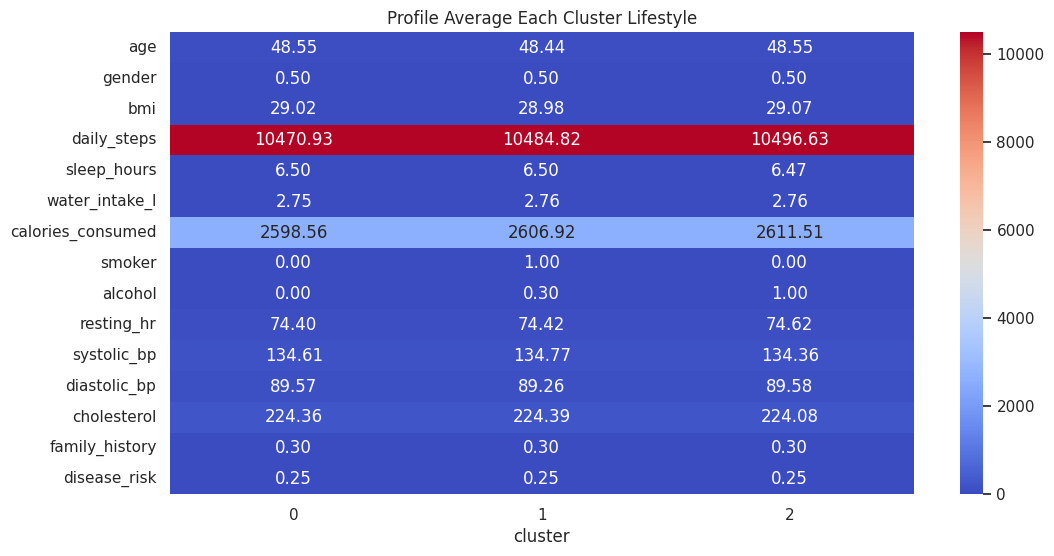

In [49]:
plt.figure(figsize=(12,6))
sns.heatmap(cluster_summary.T, cmap='coolwarm', annot=True, fmt='.2f')
plt.title('Profile Average Each Cluster Lifestyle')
plt.show()

## Multi-Ouput Regression

In [50]:
df.columns

Index(['id', 'age', 'gender', 'bmi', 'daily_steps', 'sleep_hours',
       'water_intake_l', 'calories_consumed', 'smoker', 'alcohol',
       'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
       'family_history', 'disease_risk', 'age_group'],
      dtype='object')

In [51]:
df_multi = df.copy().drop(columns=['age_group'])

le = LabelEncoder()
df_multi['gender'] = le.fit_transform(df_multi['gender'])

target_cols = ['systolic_bp', 'diastolic_bp', 'cholesterol']
X = df_multi.drop(columns=['id', 'disease_risk'] + target_cols)
y = df_multi[target_cols]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [52]:
models = {
    "Linear Regression": MultiOutputRegressor(LinearRegression()),
    "Random Forest": MultiOutputRegressor(RandomForestRegressor(n_estimators=300, random_state=42)),
    "XGBoost": MultiOutputRegressor(XGBRegressor(n_estimators=400, learning_rate=0.1, random_state=42))
}

results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    results.append({
        "Model": name,
        "MAE": mae,
        "RMSE": rmse,
        "R2": r2
    })

    print(f"\n=== {name} ===")
    print(f"MAE : {mae:.2f}")
    print(f"RMSE : {rmse:.2f}")
    print(f"R²   : {r2:.3f}")


=== Linear Regression ===
MAE : 25.00
RMSE : 30.81
R²   : -0.000

=== Random Forest ===
MAE : 25.13
RMSE : 31.08
R²   : -0.016

=== XGBoost ===
MAE : 25.25
RMSE : 31.28
R²   : -0.030


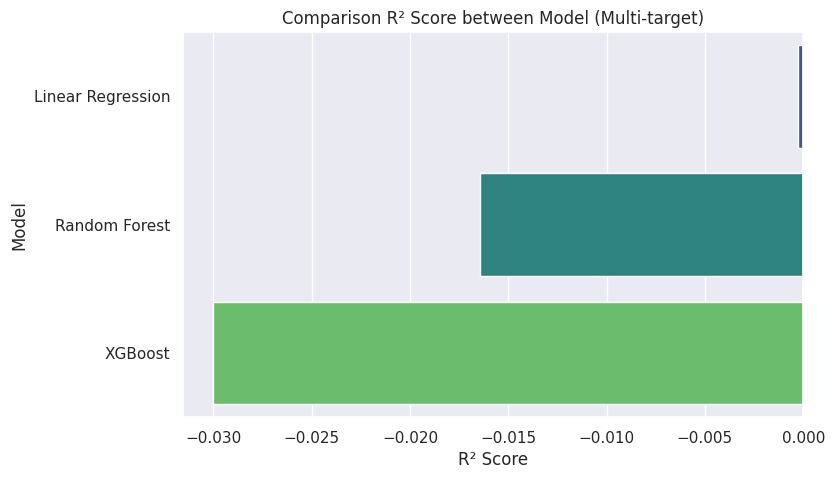

In [56]:
results_df = pd.DataFrame(results).sort_values(by='R2', ascending=False)
plt.figure(figsize=(8,5))
sns.barplot(x='R2', y='Model', data=results_df, palette='viridis')
plt.title("Comparison R² Score between Model (Multi-target)")
plt.xlabel("R² Score")
plt.show()

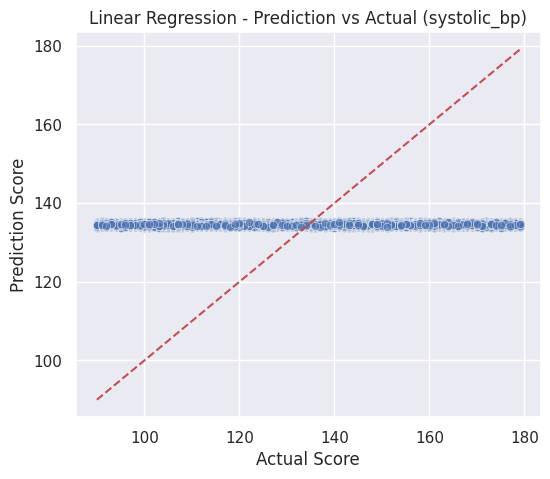

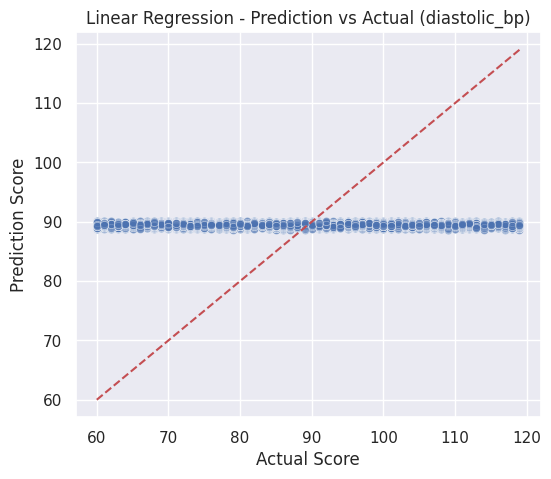

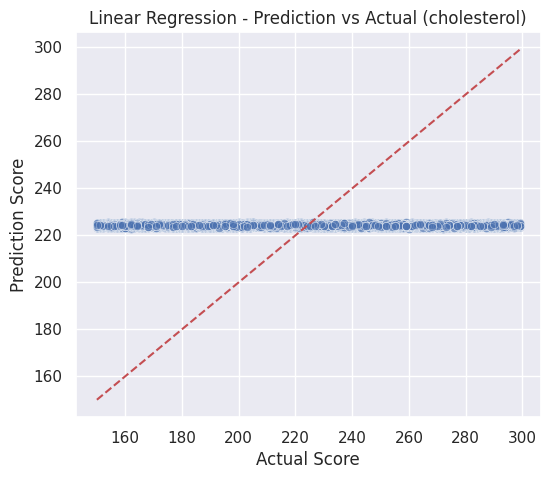

In [54]:
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]
y_pred_best = best_model.predict(X_test_scaled)

for i, col in enumerate(target_cols):
    plt.figure(figsize=(6,5))
    sns.scatterplot(x=y_test[col], y=y_pred_best[:, i], alpha=0.6)
    plt.xlabel('Actual Score')
    plt.ylabel('Prediction Score')
    plt.title(f"{best_model_name} - Prediction vs Actual ({col})")
    plt.plot(
        [y_test[col].min(), y_test[col].max()],
        [y_test[col].min(), y_test[col].max()],
        'r--'
    )
    plt.show()



## Healthy Lifestyle Recommendation System

In [61]:
df_model = df.copy()

le = LabelEncoder()
df_model['gender_enc'] = le.fit_transform(df_model['gender'])

nn_features = [
    'age', 'gender_enc', 'bmi',
    'daily_steps', 'sleep_hours', 'water_intake_l', 'calories_consumed',
    'smoker', 'alcohol', 'resting_hr'
]


target_keys_higher_better = ['daily_steps', 'sleep_hours', 'water_intake_l']
target_keys_lower_better  = ['calories_consumed', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol', 'bmi']

healthy = df_model[df_model['disease_risk'] == 0].copy()

scaler = StandardScaler()
X_healthy = scaler.fit_transform(healthy[nn_features])

K_NEIGH = 200
nn = NearestNeighbors(n_neighbors=min(K_NEIGH, len(healthy)), metric='euclidean')
nn.fit(X_healthy)

NearestNeighbors(metric='euclidean', n_neighbors=200)

In [62]:
def get_healthy_neighbors_index(user_row):
    x = user_row[nn_features].to_frame().T
    x_scaled = scaler.transform(x)
    dists, idxs = nn.kneighbors(x_scaled, return_distance=True)
    return idxs[0]


def compute_targets_from_neighbors(neigh_df):
    targets = {}
    for k in target_keys_higher_better:
        targets[k] = float(np.percentile(neigh_df[k], 75))
    for k in target_keys_lower_better:
        targets[k] = float(np.percentile(neigh_df[k], 25))
    return targets


def build_textual_advice(user, targets, tol=0.01):
    tips = []
    # Positive direction (increase)
    if user['daily_steps'] < targets['daily_steps'] - tol:
        gap = int(targets['daily_steps'] - user['daily_steps'])
        tips.append(f"Increase daily steps by ~{gap:,}/day towards ≥ {int(targets['daily_steps']):,} steps.")
    if user['sleep_hours'] < targets['sleep_hours'] - tol:
        tips.append(f"Increase sleep duration to ~{targets['sleep_hours']:.1f} hours per day.")
    if user['water_intake_l'] < targets['water_intake_l'] - tol:
        tips.append(f"Increase water intake to ~{targets['water_intake_l']:.1f} L/day.")

    # Negative direction (decrease)
    if user['calories_consumed'] > targets['calories_consumed'] + tol:
        tips.append(f"Decrease daily calories to ~{int(targets['calories_consumed']):,} kcal.")
    if user['resting_hr'] > targets['resting_hr'] + tol:
        tips.append(f"Decrease resting HR to ~{int(targets['resting_hr'])} bpm (light aerobic exercise).")
    if user['bmi'] > targets['bmi'] + tol:
        tips.append(f"Decrease BMI towards ~{targets['bmi']:.1f} (combination of calorie deficit + activity).")
    if user['systolic_bp'] > targets['systolic_bp'] + tol or user['diastolic_bp'] > targets['diastolic_bp'] + tol:
        tips.append(f"Target blood pressure of ~{int(targets['systolic_bp'])}/{int(targets['diastolic_bp'])} mmHg (low-salt diet, regular activity).")
    if user['cholesterol'] > targets['cholesterol'] + tol:
        tips.append(f"Decrease cholesterol towards ~{int(targets['cholesterol'])} mg/dL (reduce saturated fat, increase fiber).")

    # Discrete habits
    if user['smoker'] == 1:
        tips.append("Stop smoking (top priority).")
    if user['alcohol'] == 1:
        tips.append("Limit/stop alcohol consumption.")

    # If no major gaps
    if not tips:
        tips.append("Your lifestyle is already close to the healthy cohort pattern—maintain consistency!")

    return tips

In [63]:
risk_features = [
    'age', 'gender_enc', 'bmi', 'daily_steps', 'sleep_hours', 'water_intake_l',
    'calories_consumed', 'smoker', 'alcohol', 'resting_hr', 'systolic_bp', 'diastolic_bp', 'cholesterol',
    'family_history'
]
df_risk = df_model.dropna(subset=risk_features + ['disease_risk']).copy()
scaler_risk = StandardScaler()
X_risk = scaler_risk.fit_transform(df_risk[risk_features])
y_risk = df_risk['disease_risk'].astype(int)
risk_model = LogisticRegression(max_iter=200, class_weight='balanced', n_jobs=None, random_state=42)
risk_model.fit(X_risk, y_risk)

def estimate_risk_prob(user_row):
    x = user_row[risk_features].to_frame().T
    x_s = scaler_risk.transform(x)
    return float(risk_model.predict_proba(x_s)[:,1][0])

In [64]:
def recommend_for_user(user_id=None, user_row=None, return_neighbors=False):
    assert (user_id is not None) or (user_row is not None), "Give user_id or user_row."

    if user_row is None:
        user_row = df_model[df_model['id'] == user_id].iloc[0]

    idxs = get_healthy_neighbors_index(user_row)
    neigh_df = healthy.iloc[idxs].copy()

    targets = compute_targets_from_neighbors(neigh_df)

    tips = build_textual_advice(user_row, targets, tol=0.01)

    current_risk = estimate_risk_prob(user_row)
    cf_row = user_row.copy()

    for k in target_keys_higher_better + target_keys_lower_better:
        if k in cf_row.index:
            cf_row[k] = targets[k]
    counterfactual_risk = estimate_risk_prob(cf_row)

    result = {
        "user_id": int(user_row['id']),
        "current_metrics": {
            "daily_steps": float(user_row['daily_steps']),
            "sleep_hours": float(user_row['sleep_hours']),
            "water_intake_l": float(user_row['water_intake_l']),
            "calories_consumed": float(user_row['calories_consumed']),
            "resting_hr": float(user_row['resting_hr']),
            "bmi": float(user_row['bmi']),
            "systolic_bp": float(user_row['systolic_bp']),
            "diastolic_bp": float(user_row['diastolic_bp']),
            "cholesterol": float(user_row['cholesterol']),
            "smoker": int(user_row['smoker']),
            "alcohol": int(user_row['alcohol']),
        },
        "targets": targets,
        "tips": tips,
        "risk_probability_now": round(current_risk, 4),
        "risk_probability_if_follow_targets": round(counterfactual_risk, 4),
        "estimated_risk_reduction": round(current_risk - counterfactual_risk, 4)
    }
    if return_neighbors:
        result["neighbors_sample"] = neigh_df[nn_features + ['systolic_bp','diastolic_bp','cholesterol']].head(5)
    return result

In [67]:
def build_recommendations_for_all(sample_n=None):
    users = df_model if sample_n is None else df_model.head(sample_n)
    rows = []
    for _, row in users.iterrows():
        rec = recommend_for_user(user_row=row)
        out = {
            "id": rec['user_id'],
            'risk_row': rec['risk_probability_now'],
            'risk_if_follow': rec['risk_probability_if_follow_targets'],
            'risk_reduction': rec['estimated_risk_reduction'],
            **{f"target_{k}":v for k, v in rec['targets'].items()}
        }
        rows.append(out)
    out_df = pd.DataFrame(rows)
    return out_df

In [68]:
# Example for specific user
rec_one = recommend_for_user(user_id=1)
display(rec_one)

{'user_id': 1,
 'current_metrics': {'daily_steps': 4198.0,
  'sleep_hours': 3.9,
  'water_intake_l': 3.4,
  'calories_consumed': 1602.0,
  'resting_hr': 97.0,
  'bmi': 20.5,
  'systolic_bp': 161.0,
  'diastolic_bp': 111.0,
  'cholesterol': 240.0,
  'smoker': 0,
  'alcohol': 0},
 'targets': {'daily_steps': 7273.25,
  'sleep_hours': 5.125,
  'water_intake_l': 3.9,
  'calories_consumed': 1523.75,
  'resting_hr': 86.0,
  'systolic_bp': 111.0,
  'diastolic_bp': 77.0,
  'cholesterol': 185.0,
  'bmi': 20.075000000000003},
 'tips': ['Increase daily steps by ~3,075/day towards ≥ 7,273 steps.',
  'Increase sleep duration to ~5.1 hours per day.',
  'Increase water intake to ~3.9 L/day.',
  'Decrease daily calories to ~1,523 kcal.',
  'Decrease resting HR to ~86 bpm (light aerobic exercise).',
  'Decrease BMI towards ~20.1 (combination of calorie deficit + activity).',
  'Target blood pressure of ~111/77 mmHg (low-salt diet, regular activity).',
  'Decrease cholesterol towards ~185 mg/dL (reduce s

In [69]:
rec_df = build_recommendations_for_all(sample_n=1000)
rec_df.head()

id  risk_row  risk_if_follow  risk_reduction  target_daily_steps  \
0   1    0.4946          0.4973         -0.0026             7273.25   
1   2    0.5030          0.4991          0.0039            16599.50   
2   3    0.4969          0.5018         -0.0049             5889.25   
3   4    0.4995          0.4971          0.0025            17475.75   
4   5    0.5082          0.5049          0.0033             9840.50   

   target_sleep_hours  target_water_intake_l  target_calories_consumed  \
0               5.125                  3.900                   1523.75   
1               9.200                  4.600                   2034.00   
2               7.500                  4.400                   1538.00   
3               5.000                  2.500                   2135.50   
4               5.400                  4.225                   3133.00   

   target_resting_hr  target_systolic_bp  target_diastolic_bp  \
0              86.00              111.00                 77.0   
1              63.00              115.50                 76.0   
2              81.00              111.75                 72.0   
3              64.00              110.00                 76.0   
4              84.75              109.00                 79.0   

   target_cholesterol  target_bmi  
0              185.00      20.075  
1              195.00      30.800  
2              182.00      28.575  
3              179.75      34.675  
4              191.75      29.975

For tips, you can use AI for generate some tips for user.